## DATA 1030 Project Code

#### Checking for the DATA 1030 environment

In [1]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version
import warnings

# ignores all unnecessary warnings
warnings.filterwarnings('ignore')

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.10 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod

# first check the Python version
pyversion = Version(python_version())

if pyversion >= Version("3.11.4"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.11"):
    print(FAIL, "Python version 3.11 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)
    
print()
requirements = {'numpy': "1.24.4", 'matplotlib': "3.7.2",'sklearn': "1.3.0", 
                'pandas': "2.0.3",'xgboost': "1.7.6", 'shap': "0.42.1", 'seaborn': "0.12.2"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

# re-enables warnings for future cells
warnings.filterwarnings('default')

[ OK ] Python version is 3.11.4

[ OK ] numpy version 1.24.4 is installed.
[ OK ] matplotlib version 3.7.2 is installed.
[ OK ] sklearn version 1.3.0 is installed.
[ OK ] pandas version 2.0.3 is installed.
[ OK ] xgboost version 1.7.6 is installed.
[ OK ] shap version 0.42.1 is installed.
[ OK ] seaborn version 0.12.2 is installed.


### Part 1: Data Transformations

#### Reading in the CSV files

In [2]:
import pandas as pd

# instantiates a file stem as the files are too large to upload to GitHub
stem = '/Users/Aryan/Desktop/DATA1030-Fall2023/data-1030-project-data/'

# reads in the csv file with the crime data from 2010 to 2019
df_10_19 = pd.read_csv(stem + 'crime_data_2010_to_2019.csv')

# reads in the csv file with the crime data from 2020 to the present
df_20_pres = pd.read_csv(stem + 'crime_data_2020_to_present.csv')

#### Concatenating both dataframes into a single dataframe for analysis

In [3]:
# prints the column headers to see whether we can combine both dataframes seamlessly
print(list(df_10_19.columns))
print(list(df_20_pres.columns))

['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA ', 'AREA NAME', 'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc', 'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT', 'LON']
['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME', 'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc', 'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT', 'LON']


In [4]:
# renames the only column that differs among the dataframes
df_10_19 = df_10_19.rename(columns = {'AREA ': 'AREA'})

# checks if the columns of the dataframes are the same
if list(df_10_19.columns) == list(df_20_pres.columns):
    print("The columns of both DataFrames are the same.")
else:
    print("The columns of the DataFrames are different.")

The columns of both DataFrames are the same.


In [5]:
# retrieves the first 5 rows of the first dataframe to see whether we can combine both dataframes seamlessly
df_10_19.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",...,IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488


In [6]:
# retrieves the first 5 rows of the second dataframe to see whether we can combine both dataframes seamlessly
df_20_pres.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [7]:
# checks the shape of each dataframe before concatenating
print(df_10_19.shape)
print(df_20_pres.shape)

(2119797, 28)
(708084, 28)


In [8]:
# concatenates the two dataframes and reindexes
df = pd.concat([df_10_19, df_20_pres], ignore_index = True)
df = df.reindex()

# checks the shape of the concatenated dataframe
print(df.shape)

(2827881, 28)


In [9]:
# retrieves the first 5 rows of the new dataframe
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",...,IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488


#### Modifying column formatting for clarity

In [10]:
# retrieves the datatypes of all the columns in the dataframe
print(df.dtypes)

DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object


In [11]:
# renames unclear columns in the dataframe
df = df.rename(columns = {
    'DR_NO': 'Record ID',
    'Date Rptd': 'Date Reported',
    'DATE OCC': 'Date Occurred',
    'TIME OCC': 'Time Occurred',
    'AREA': 'Area',
    'AREA NAME': 'Area Name',
    'Rpt Dist No': 'Report Dist No',
    'Crm Cd': 'Crime Code',
    'Crm Cd Desc': 'Crime Code Desc',
    'Vict Descent': 'Vict Race',
    'Premis Cd': 'Premise Code',
    'Premis Desc': 'Premise Desc',
    'Weapon Used Cd': 'Weapon Used Code',
    'Crm Cd 1': 'Crime Code 1',
    'Crm Cd 2': 'Crime Code 2',
    'Crm Cd 3': 'Crime Code 3',
    'Crm Cd 4': 'Crime Code 4',
    'LOCATION': 'Location',
    'LAT': 'Latitude',
    'LON': 'Longitude'})

In [12]:
# instantiates a list of columns to adjust capitalization formatting
col_to_fix_cap = ['Crime Code Desc', 'Premise Desc', 'Weapon Desc', 'Location', 'Cross Street']

# capitalizes the first letter of each word in the specified columns
df[col_to_fix_cap] = df[col_to_fix_cap].applymap(lambda x: str(x).title() if not pd.isna(x) else x)

### Part 2: Exploratory Data Analysis

#### Evaluating the target variable, crime

In [13]:
# retrieves the descriptive statistics of the target variable to verify that it is categorical
df['Crime Code Desc'].describe()

count                      2827881
unique                         144
top       Battery - Simple Assault
freq                        246420
Name: Crime Code Desc, dtype: object

In [14]:
# counts the values of the target variable to verify that it is categorical
df['Crime Code Desc'].value_counts()

Crime Code Desc
Battery - Simple Assault                                   246420
Vehicle - Stolen                                           235962
Burglary From Vehicle                                      206332
Burglary                                                   190916
Theft Plain - Petty ($950 & Under)                         186135
                                                            ...  
Till Tap - Attempt                                              4
Firearms Emergency Protective Order (Firearms Epo)              4
Train Wrecking                                                  2
Drunk Roll - Attempt                                            1
Firearms Temporary Restraining Order (Temp Firearms Ro)         1
Name: count, Length: 144, dtype: int64

#### Visualizing the target variable, crime

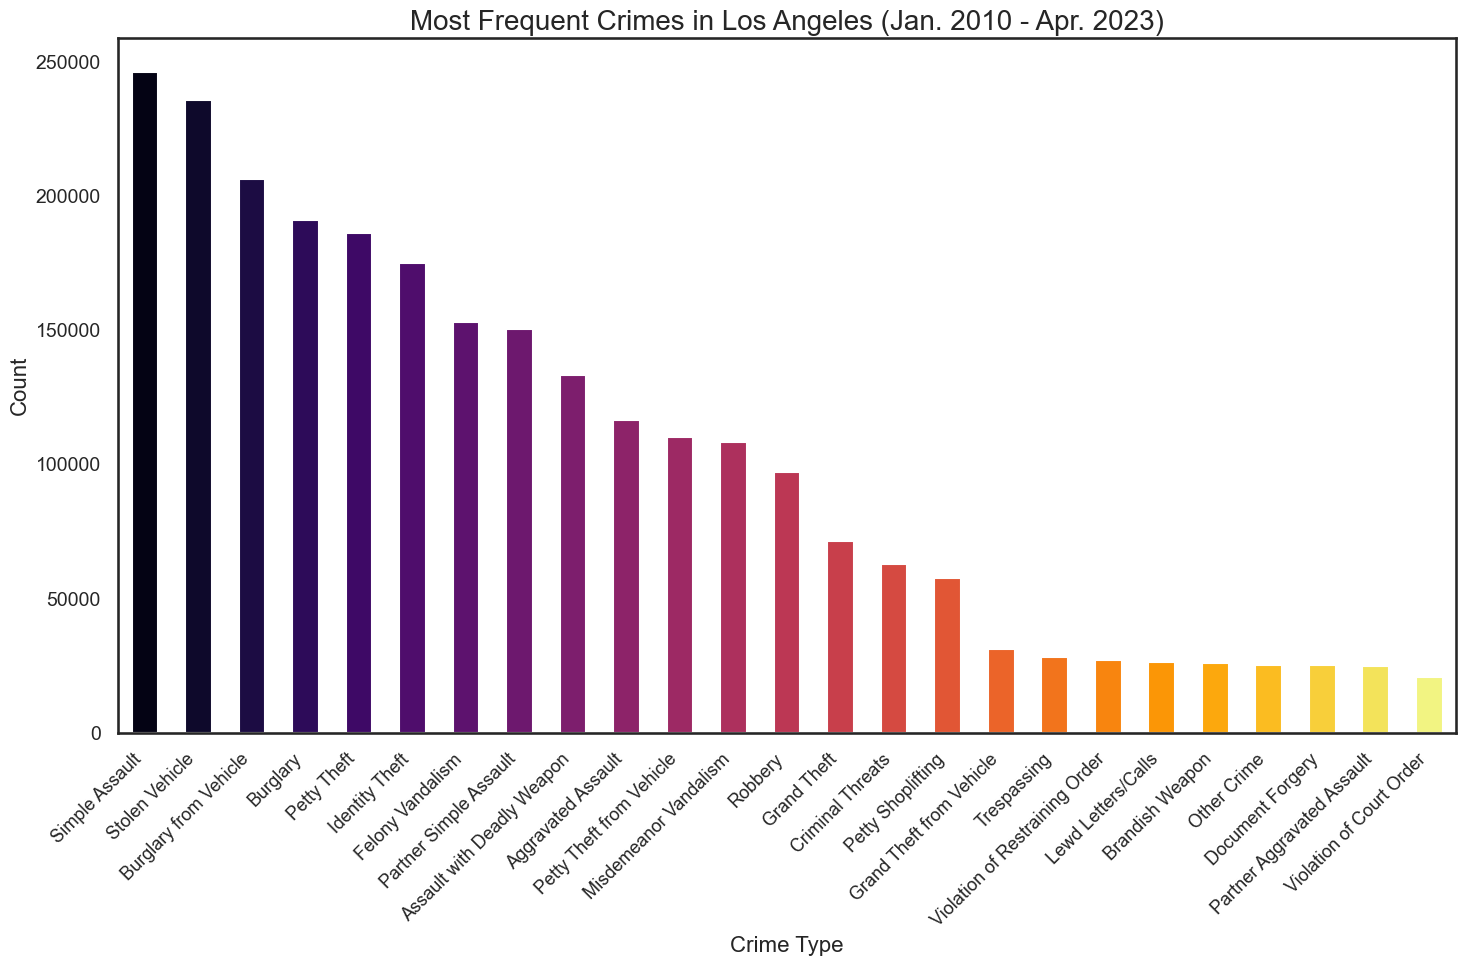

In [15]:
from matplotlib import pylab as plt
import seaborn as sns

# sets a style and context
sns.set_style('white')
sns.set_context('talk') 

# filters crime categories based on a threshold of 20,000 occurrences
filtered_cat = pd.value_counts(df['Crime Code Desc'])
filtered_cat = filtered_cat[filtered_cat > 20000]

# retrieves the labels of the categories within the threshold
filtered_labels = list(filtered_cat.index)

# renames the labels of the categories for clarity
renamed_labels = {
    filtered_labels[0]: 'Simple Assault',
    filtered_labels[1]: 'Stolen Vehicle',
    filtered_labels[2]: 'Burglary from Vehicle',
    filtered_labels[3]: 'Burglary',
    filtered_labels[4]: 'Petty Theft',
    filtered_labels[5]: 'Identity Theft',
    filtered_labels[6]: 'Felony Vandalism',
    filtered_labels[7]: 'Partner Simple Assault',
    filtered_labels[8]: 'Assault with Deadly Weapon',
    filtered_labels[9]: 'Aggravated Assault',
    filtered_labels[10]: 'Petty Theft from Vehicle',
    filtered_labels[11]: 'Misdemeanor Vandalism',
    filtered_labels[12]: 'Robbery',
    filtered_labels[13]: 'Grand Theft',
    filtered_labels[14]: 'Criminal Threats',
    filtered_labels[15]: 'Petty Shoplifting',
    filtered_labels[16]: 'Grand Theft from Vehicle',
    filtered_labels[17]: 'Trespassing',
    filtered_labels[18]: 'Violation of Restraining Order',
    filtered_labels[19]: 'Lewd Letters/Calls',
    filtered_labels[20]: 'Brandish Weapon',
    filtered_labels[21]: 'Other Crime',
    filtered_labels[22]: 'Document Forgery',
    filtered_labels[23]: 'Partner Aggravated Assault',
    filtered_labels[24]: 'Violation of Court Order'}

# replaces the original labels with the renamed ones
new_labels = [renamed_labels.get(label, label) for label in filtered_labels]

# adjusts the size of the figure
plt.figure(figsize = (15, 10))

# plots the crimes above the threshold to visualize the target variable
filtered_cat.plot.bar(color = sns.color_palette('inferno', len(filtered_cat)))
plt.xticks(range(len(new_labels)), new_labels, rotation = 45, ha = 'right', fontsize = 13)
plt.yticks(fontsize = 14)
plt.xlabel('Crime Type', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.title('Most Frequent Crimes in Los Angeles (Jan. 2010 - Apr. 2023)', fontsize = 20)
plt.tight_layout()
plt.show()

#### Visualizing the relationship between victim sex and crime

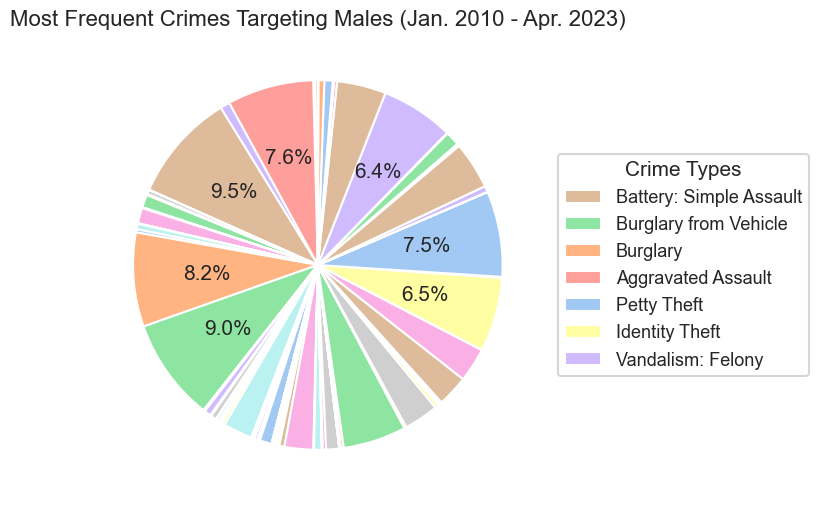

In [16]:
import numpy as np

# sets a style and context
sns.set_style('white')
sns.set_context('talk')

# drops rows with NaN values from the desired columns
df_pie_m = df.dropna(subset = ['Vict Sex', 'Crime Code Desc'])

# groups by the sex column and counts occurrences of each crime code
grouped_col_m = df_pie_m.groupby('Vict Sex')['Crime Code Desc'].value_counts().unstack().fillna(0)

# formats the labels of the pie chart
def labeler(pct, allvals):
    if pct > 6:
        return "{:.1f}%".format(pct) # only returns percentages above 6%
    return ""

# plots a pie chart of crime for male victims
if 'M' in grouped_col_m.index:
    counts_m = grouped_col_m.loc['M']

    # customizes the color of the pie chart
    colors_m = sns.color_palette('pastel', len(counts_m))

    # initializes the figure and axis
    fig, ax = plt.subplots(figsize = (10, 6))

    # gets indices that sort the counts in descending order
    sorted_indices_m = counts_m.argsort()[::-1]

    # plots the chart
    wedges, texts, autotexts = ax.pie(counts_m, autopct = lambda pct: labeler(pct, counts_m), startangle = 90, colors = colors_m)

    # adjusts the font size for the percentage labels on the pie chart
    for autotext in autotexts:
        autotext.set_fontsize(15)
    
    # retrieves labels for crimes with a proportion above 6%
    necessary_labels_m = [(desc, value) for desc, value in zip(counts_m.index, counts_m) if value/sum(counts_m) > 0.06]

    # renames labels for clarity
    renamed_labels_m = {
        'Assault With Deadly Weapon, Aggravated Assault': 'Aggravated Assault',
        'Battery - Simple Assault': 'Battery: Simple Assault',
        'Burglary': 'Burglary',
        'Burglary From Vehicle': 'Burglary from Vehicle',
        'Theft Of Identity': 'Identity Theft',
        'Theft Plain - Petty ($950 & Under)': 'Petty Theft',
        'Vandalism - Felony ($400 & Over, All Church Vandalisms)': 'Vandalism: Felony'}
    
    # sorts the labels based on counts in descending order
    sorted_necessary_labels_m = sorted(necessary_labels_m, key = lambda x: x[1], reverse = True)
    
    # extracts the descriptions from the label tuples
    labels_for_legend_m = [renamed_labels_m.get(label[0], label[0]) for label in sorted_necessary_labels_m]

    # creates a legend using the labels and pie sizes
    sorted_wedges_m = [wedges[i] for i in sorted_indices_m]
    ax.legend(sorted_wedges_m, labels_for_legend_m, title = 'Crime Types', loc = 'center left', bbox_to_anchor = (1, 0, 0.5, 1), fontsize = 13).get_title().set_fontsize('15')

    # sets labels for the wedges in the pie chart
    for w, t in zip(wedges, labels_for_legend_m):
        w.set_label(t)
    
    ax.set_ylabel('')
    ax.set_title('Most Frequent Crimes Targeting Males (Jan. 2010 - Apr. 2023)', fontsize = 16)
    plt.show()
    
else:
    print("No data is available for male victims.")

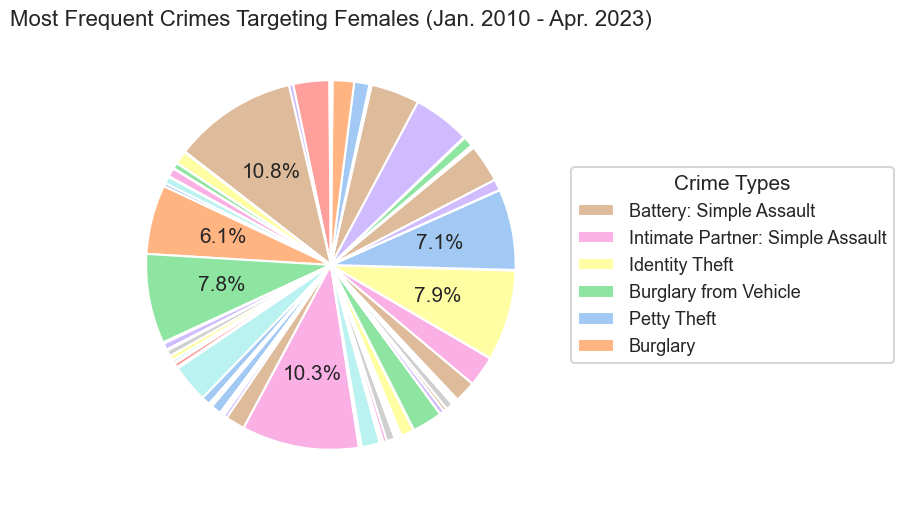

In [17]:
# sets a style and context
sns.set_style('white')
sns.set_context('talk')

# drops rows with NaN values from the desired columns
df_pie_f = df.dropna(subset = ['Vict Sex', 'Crime Code Desc'])

# groups by the sex column and counts occurrences of each crime code
grouped_col_f = df_pie_f.groupby('Vict Sex')['Crime Code Desc'].value_counts().unstack().fillna(0)

# formats the labels of the pie chart
def labeler(pct, allvals):
    if pct > 6:
        return "{:.1f}%".format(pct) # only returns percentages above 6%
    return ""

# plots a pie chart of crime for female victims
if 'F' in grouped_col_f.index:
    counts_f = grouped_col_f.loc['F']

    # customizes the color of the pie chart
    colors_f = sns.color_palette('pastel', len(counts_f))

    # initializes the figure and axis
    fig, ax = plt.subplots(figsize = (10, 6))

    # gets indices that sort the counts in descending order
    sorted_indices_f = counts_f.argsort()[::-1]
    
    # plots the chart
    wedges, texts, autotexts = ax.pie(counts_f, autopct = lambda pct: labeler(pct, counts_f), startangle = 90, colors = colors_f)

    # adjusts the font size for the percentage labels on the pie chart
    for autotext in autotexts:
        autotext.set_fontsize(15)
    
    # retrieves labels for crimes with a proportion above 6%
    necessary_labels_f = [(desc, value) for desc, value in zip(counts_f.index, counts_f) if value/sum(counts_f) > 0.06]

    # renames labels for clarity
    renamed_labels_f = {
        'Battery - Simple Assault': 'Battery: Simple Assault',
        'Intimate Partner - Simple Assault': 'Intimate Partner: Simple Assault',
        'Theft Of Identity': 'Identity Theft',
        'Burglary From Vehicle': 'Burglary from Vehicle',
        'Theft Plain - Petty ($950 & Under)': 'Petty Theft',
        'Burglary': 'Burglary'}

    # sorts the labels based on counts in descending order
    sorted_necessary_labels_f = sorted(necessary_labels_f, key = lambda x: x[1], reverse = True)
    
    # extracts the descriptions from the sorted label tuples
    labels_for_legend_f = [renamed_labels_f.get(label[0], label[0]) for label in sorted_necessary_labels_f]

    # creates a legend using the labels and pie sizes
    sorted_wedges_f = [wedges[i] for i in sorted_indices_f]
    ax.legend(sorted_wedges_f, labels_for_legend_f, title = 'Crime Types', loc = 'center left', bbox_to_anchor = (1, 0, 0.5, 1), fontsize = 13).get_title().set_fontsize('15')

    # sets labels for the wedges in the pie chart
    for w, t in zip(wedges, labels_for_legend_f):
        w.set_label(t)
    
    ax.set_ylabel('')
    ax.set_title('Most Frequent Crimes Targeting Females (Jan. 2010 - Apr. 2023)', fontsize = 16)
    plt.show()
    
else:
    print("No data is available for female victims.")

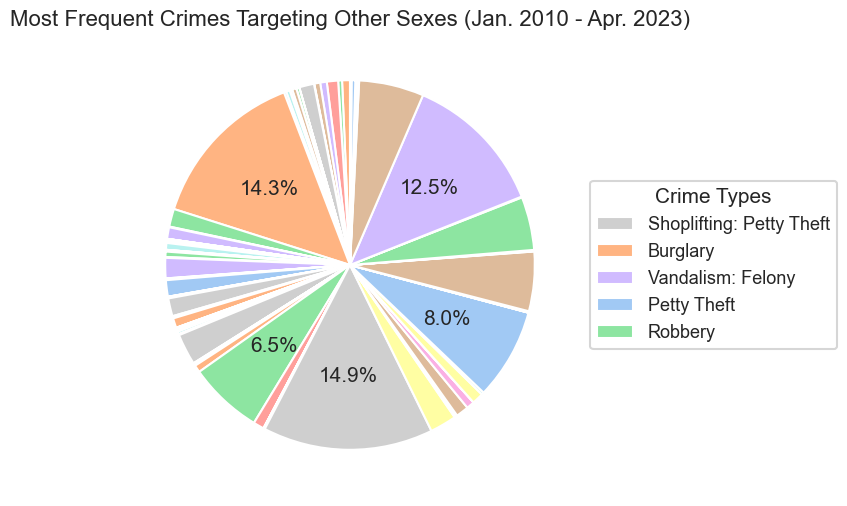

In [18]:
# sets a style and context
sns.set_style('white')
sns.set_context('talk')

# drops rows with NaN values from the desired columns
df_pie_o = df.dropna(subset = ['Vict Sex', 'Crime Code Desc'])

# groups by the sex column and counts occurrences of each crime code
grouped_col_o = df_pie_o.groupby('Vict Sex')['Crime Code Desc'].value_counts().unstack().fillna(0)

# combines rows other than 'M' and 'F' into 'Other' row
grouped_col_o.loc['Other'] = grouped_col_o.loc[~grouped_col_o.index.isin(['M', 'F'])].sum()
grouped_col_o = grouped_col_o[grouped_col_o.index.isin(['M', 'F', 'Other'])]

# formats the labels of the pie chart
def labeler(pct, allvals):
    if pct > 6:
        return "{:.1f}%".format(pct) # only returns percentages above 6%
    return ""

# plots a pie chart of crime for other victims
if 'Other' in grouped_col_o.index:
    counts_o = grouped_col_o.loc['Other']

    # customizes the color of the pie chart
    colors_o = sns.color_palette('pastel', len(counts_o))

    # initializes the figure and axis
    fig, ax = plt.subplots(figsize = (10, 6))

    # gets indices that sort the counts in descending order
    sorted_indices_o = counts_o.argsort()[::-1]
    
    # plots the chart
    wedges, texts, autotexts = ax.pie(counts_o, autopct = lambda pct: labeler(pct, counts_o), startangle = 90, colors = colors_o)

    # adjusts the font size for the percentage labels on the pie chart
    for autotext in autotexts:
        autotext.set_fontsize(15)
    
    # retrieves labels for crimes with a proportion above 6%
    necessary_labels_o = [(desc, value) for desc, value in zip(counts_f.index, counts_o) if value/sum(counts_o) > 0.06]

    # renames labels for clarity
    renamed_labels_o = {
        'Shoplifting - Petty Theft ($950 & Under)': 'Shoplifting: Petty Theft',
        'Burglary': 'Burglary',
        'Vandalism - Felony ($400 & Over, All Church Vandalisms)': 'Vandalism: Felony',
        'Theft Plain - Petty ($950 & Under)': 'Petty Theft',
        'Robbery': 'Robbery'}

    # sorts the labels based on counts in descending order
    sorted_necessary_labels_o = sorted(necessary_labels_o, key = lambda x: x[1], reverse = True)
    
    # extracts the descriptions from the sorted label tuples
    labels_for_legend_o = [renamed_labels_o.get(label[0], label[0]) for label in sorted_necessary_labels_o]

    # creates a legend using the labels and pie sizes
    sorted_wedges_o = [wedges[i] for i in sorted_indices_o]
    ax.legend(sorted_wedges_o, labels_for_legend_o, title = 'Crime Types', loc = 'center left', bbox_to_anchor = (1, 0, 0.5, 1), fontsize = 13).get_title().set_fontsize('15')

    # sets labels for the wedges in the pie chart
    for w, t in zip(wedges, labels_for_legend_o):
        w.set_label(t)
    
    ax.set_ylabel('')
    ax.set_title('Most Frequent Crimes Targeting Other Sexes (Jan. 2010 - Apr. 2023)', fontsize = 16)
    plt.show()
    
else:
    print("No data is available for other victims.")

#### Visualizing the relationship between geographic area and crime

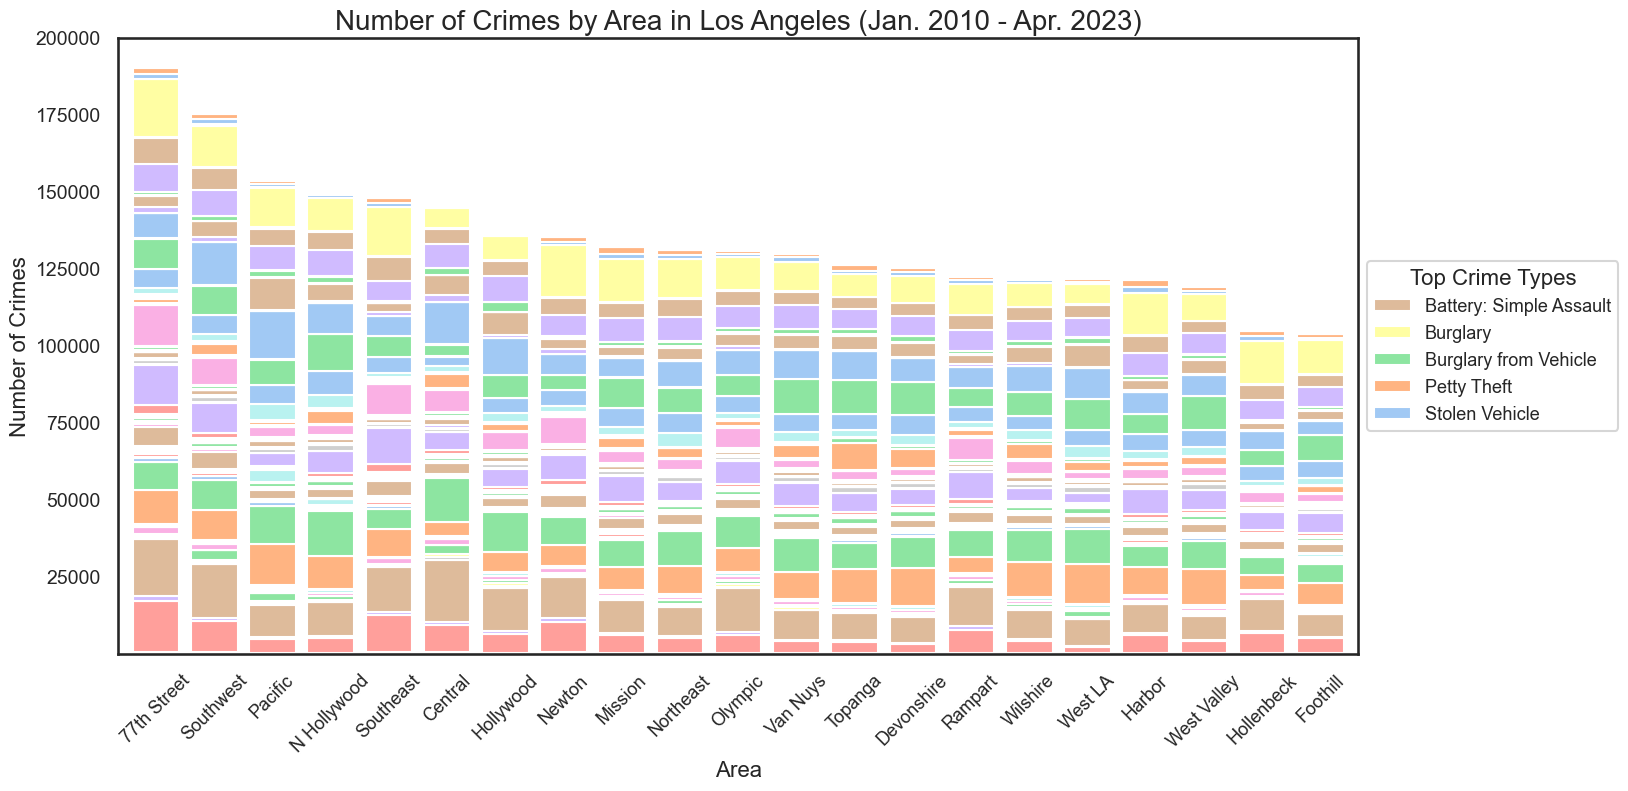

In [19]:
# sets a color palette for the bars
sns.set_palette('pastel', 24)

# aggregates the data to get the count of crime type for each area
agg_data = df.groupby(['Area Name', 'Crime Code Desc']).size().unstack().fillna(0)

# calculates the sum of crimes for each area
agg_data['total_crimes'] = agg_data.sum(axis = 1)

# sorts the areas in decreasing order by total crimes
agg_data = agg_data.sort_values(by = 'total_crimes', ascending = False).drop(columns = ['total_crimes'])

# determines the top 5 crimes across all areas
top_5_crimes = agg_data.sum().nlargest(5).index

# plots a stacked bar chart using all the crime types
ax = agg_data.plot(kind = 'bar', stacked = True, figsize = (16, 8), width = 0.8)

# instantiates a legend that shows the top 5 crime types
handles, labels = ax.get_legend_handles_labels()
filtered_handles = [handles[labels.index(crime)] for crime in top_5_crimes if crime in labels]
filtered_labels = [label for label in labels if label in top_5_crimes]

# creates a dictionary to update the crime type names
crime_names = {
    'Battery - Simple Assault': 'Battery: Simple Assault',
    'Burglary': 'Burglary',
    'Burglary From Vehicle': 'Burglary from Vehicle',
    'Theft Plain - Petty ($950 & Under)': 'Petty Theft',
    'Vehicle - Stolen': 'Stolen Vehicle'}

# uses the dictionary to update the legend
renamed_labels = [crime_names.get(label, label) for label in filtered_labels]
ax.legend(filtered_handles, renamed_labels, title = 'Top Crime Types', loc = 'center left', bbox_to_anchor = (1, 0.5), fontsize = 13).get_title().set_fontsize('16')

plt.xticks(rotation = 45, fontsize = 13)
plt.yticks(fontsize = 14)

plt.title('Number of Crimes by Area in Los Angeles (Jan. 2010 - Apr. 2023)', fontsize = 20)
plt.ylabel('Number of Crimes', fontsize = 16)
plt.xlabel('Area', fontsize = 16)
plt.show()

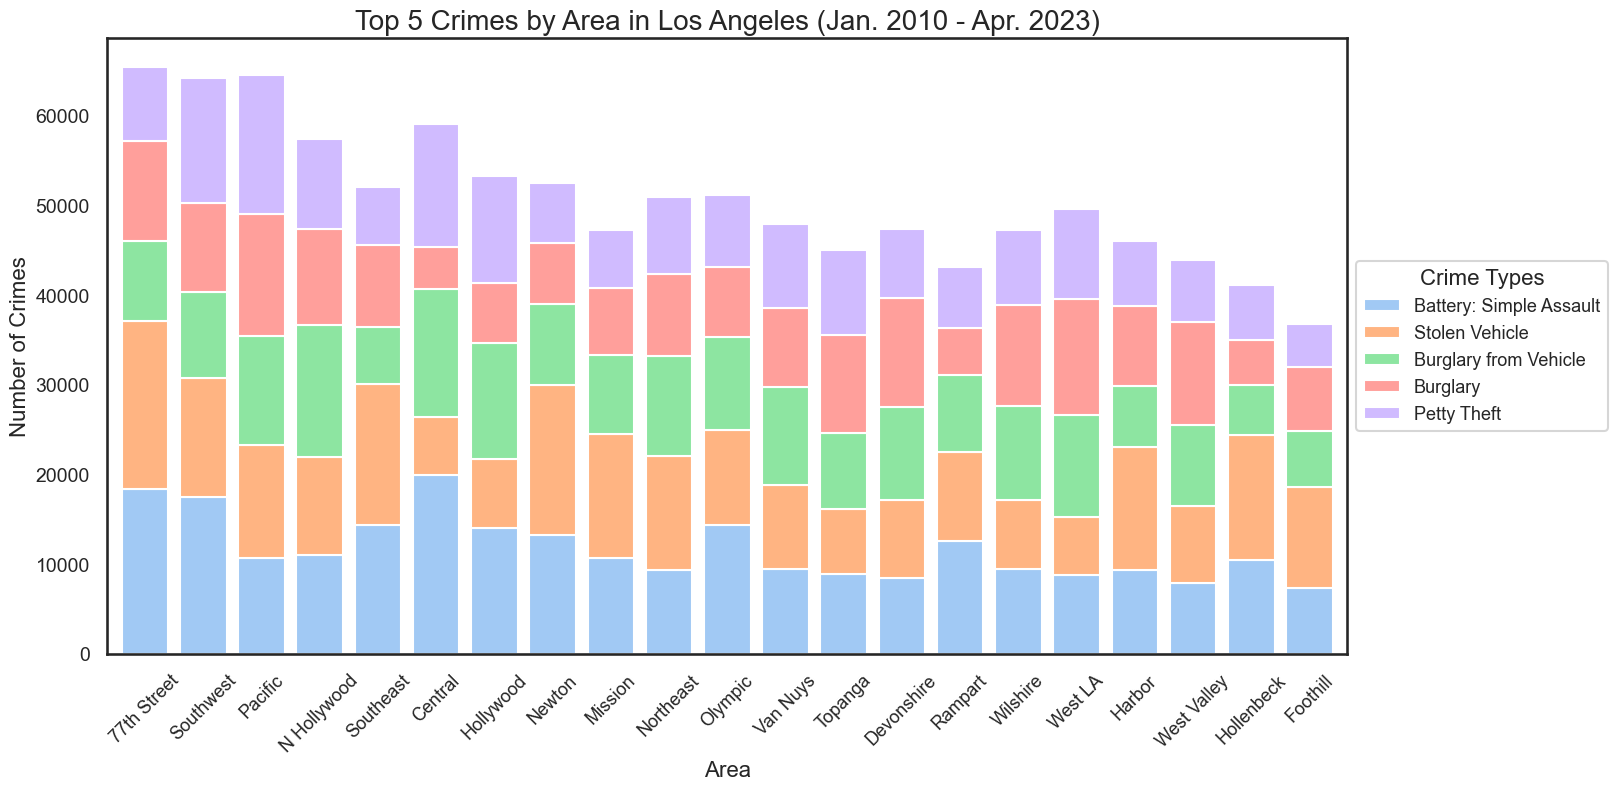

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# sets a color palette for the bars
sns.set_palette('pastel', 5)

# aggregates the data to get the count of crime type for each area
agg_data = df.groupby(['Area Name', 'Crime Code Desc']).size().unstack().fillna(0)

# calculates the sum of crimes for each area
agg_data['total_crimes'] = agg_data.sum(axis = 1)

# determines the top 5 crimes across all areas
top_5_crimes = agg_data.drop(columns=['total_crimes']).sum().nlargest(5).index

# sorts the areas in decreasing order by total crimes
sorted_agg_data = agg_data.sort_values(by = 'total_crimes', ascending = False)

# filters to only keep the top 5 crimes
filtered_agg_data = sorted_agg_data[top_5_crimes]

# plots a stacked bar chart using the top 5 crime types
ax = filtered_agg_data.plot(kind = 'bar', stacked = True, figsize = (16, 8), width = 0.8)

# instantiates a legend that shows the top 5 crime types
handles, labels = ax.get_legend_handles_labels()
filtered_handles = [handles[labels.index(crime)] for crime in top_5_crimes]
filtered_labels = [label for label in top_5_crimes]

# creates a dictionary to update the crime type names
crime_names = {
    'Battery - Simple Assault': 'Battery: Simple Assault',
    'Burglary': 'Burglary',
    'Burglary From Vehicle': 'Burglary from Vehicle',
    'Theft Plain - Petty ($950 & Under)': 'Petty Theft',
    'Vehicle - Stolen': 'Stolen Vehicle'}

# uses the dictionary to update the legend
renamed_labels = [crime_names.get(label, label) for label in filtered_labels]
ax.legend(filtered_handles, renamed_labels, title = 'Crime Types', loc = 'center left', bbox_to_anchor = (1, 0.5), fontsize = 13).get_title().set_fontsize('16')

plt.xticks(rotation = 45, fontsize = 13)
plt.yticks(fontsize = 14)

plt.title('Top 5 Crimes by Area in Los Angeles (Jan. 2010 - Apr. 2023)', fontsize = 20)
plt.ylabel('Number of Crimes', fontsize = 16)
plt.xlabel('Area', fontsize = 16)
plt.show()

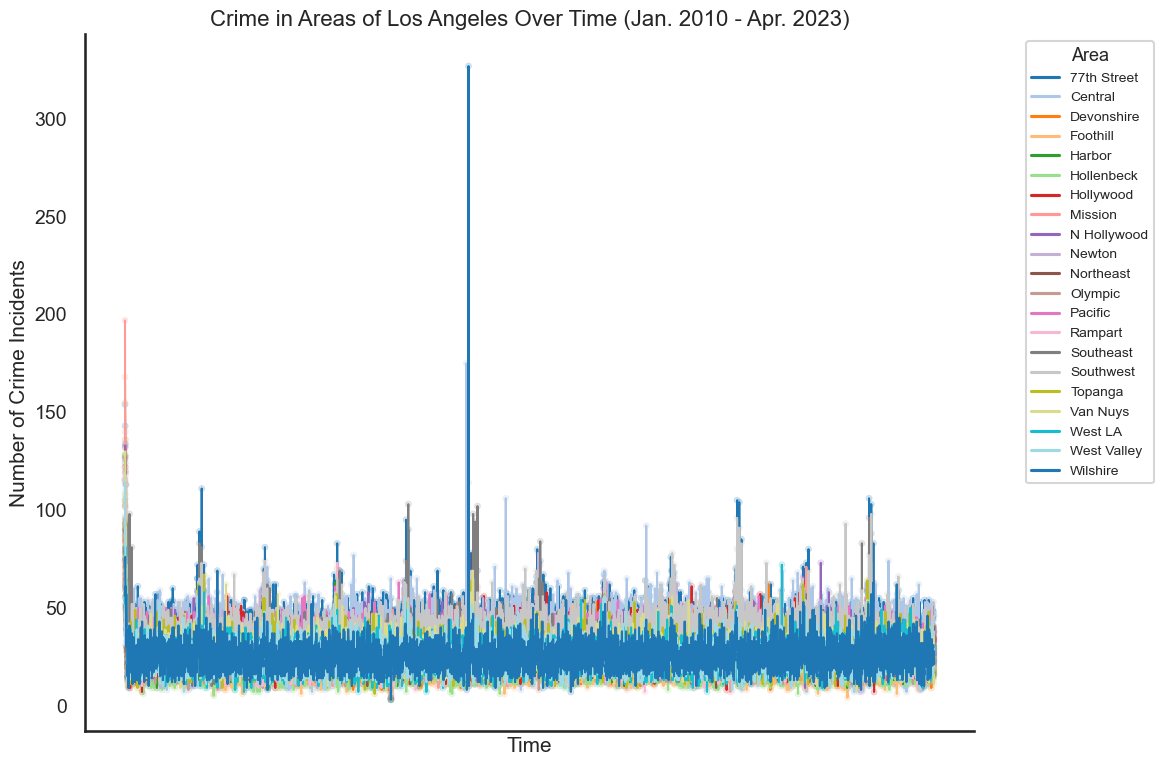

In [21]:
# groups by date and area and then count the number of incidents
date_area_grouped = df.groupby(['Date Occurred', 'Area Name']).size().reset_index(name = 'Incidents Count')

# creates a scatter plot
plt.figure(figsize = (12, 8))
sns.scatterplot(data = date_area_grouped, y = 'Incidents Count', x = 'Date Occurred', hue = 'Area Name', palette = 'tab20', alpha = 0.2, edgecolor = None, s = 20, legend = False)

# adds trend lines for each area
sns.lineplot(data = date_area_grouped, y = 'Incidents Count', x = 'Date Occurred', hue = 'Area Name', palette = 'tab20', lw = 1.5, estimator = None)

# instantiates a legend outside the plot
plt.legend(title = 'Area', bbox_to_anchor = (1.05, 1), loc = 'upper left', fontsize = 10).get_title().set_fontsize('13')

# sets date formatting on the x-axis for better readability
plt.xticks([])
plt.yticks(fontsize = 14)
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %d, %Y'))

# removes top and right spines
sns.despine()

plt.title('Crime in Areas of Los Angeles Over Time (Jan. 2010 - Apr. 2023)', fontsize = 16)
plt.xlabel('Time', fontsize = 15)
plt.ylabel('Number of Crime Incidents', fontsize = 15)
plt.tight_layout()
plt.show()

### Part 3: Data Preprocessing

#### Handling missing values in the data

In [22]:
# counts NaN values in each column of the dataframe
na_counts = df.isna().sum()
print(na_counts)

Record ID                 0
Date Reported             0
Date Occurred             0
Time Occurred             0
Area                      0
Area Name                 0
Report Dist No            0
Part 1-2                  0
Crime Code                0
Crime Code Desc           0
Mocodes              325563
Vict Age                  0
Vict Sex             289408
Vict Race            289460
Premise Code             61
Premise Desc            572
Weapon Used Code    1869579
Weapon Desc         1869580
Status                    3
Status Desc               0
Crime Code 1             19
Crime Code 2        2634640
Crime Code 3        2822566
Crime Code 4        2827722
Location                  0
Cross Street        2357662
Latitude                  0
Longitude                 0
dtype: int64


In [23]:
# calculates the prominence of missing values
print('Data Dimensions:', df.shape)
perc_missing_per_ftr = df.isnull().sum(axis = 0)/df.shape[0]
print('Fraction of Missing Values in Features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
frac_missing = sum(df.isnull().sum(axis = 1) != 0)/df.shape[0]
print('Fraction of Points with Missing Values:', frac_missing)
features_with_missing = df.isnull().sum() > 0
frac_features_missing = features_with_missing.sum()/len(df.columns)
print('Fraction of Features with Missing Values:', frac_features_missing)

Data Dimensions: (2827881, 28)
Fraction of Missing Values in Features:
Mocodes             0.115126
Vict Sex            0.102341
Vict Race           0.102359
Premise Code        0.000022
Premise Desc        0.000202
Weapon Used Code    0.661124
Weapon Desc         0.661124
Status              0.000001
Crime Code 1        0.000007
Crime Code 2        0.931666
Crime Code 3        0.998121
Crime Code 4        0.999944
Cross Street        0.833720
dtype: float64
Fraction of Points with Missing Values: 0.9999897449715882
Fraction of Features with Missing Values: 0.4642857142857143


In [24]:
# drops columns with significant missing values that are not important to our analysis
df2 = df.drop(columns = ['Mocodes', 'Weapon Desc', 'Crime Code 2', 'Crime Code 3', 'Crime Code 4', 'Cross Street'])

In [25]:
# drops rows with missing values for important columns that only have a few missing values
df2 = df2.dropna(subset = ['Vict Sex'])
df2 = df2.dropna(subset = ['Vict Race'])
df2 = df2.dropna(subset = ['Premise Code'])
df2 = df2.dropna(subset = ['Premise Desc'])
df2 = df2.dropna(subset = ['Status'])
df2 = df2.dropna(subset = ['Crime Code 1'])

In [26]:
# counts NaN values in each column of the dataframe after cleaning
na_counts_post_cleaning = df2.isna().sum()
print(na_counts_post_cleaning)

Record ID                 0
Date Reported             0
Date Occurred             0
Time Occurred             0
Area                      0
Area Name                 0
Report Dist No            0
Part 1-2                  0
Crime Code                0
Crime Code Desc           0
Vict Age                  0
Vict Sex                  0
Vict Race                 0
Premise Code              0
Premise Desc              0
Weapon Used Code    1580048
Status                    0
Status Desc               0
Crime Code 1              0
Location                  0
Latitude                  0
Longitude                 0
dtype: int64


In [27]:
# drops columns that are not important to our analysis
df2 = df2.drop(columns = ['Record ID', 'Date Reported', 'Report Dist No', 'Part 1-2', 'Crime Code', 'Status', 'Status Desc', 'Crime Code 1', 'Location', 'Latitude', 'Longitude'])

In [28]:
# removes unknown and missing values from the Vict Race column
df2 = df2[~df2['Vict Race'].isin(['X', '-'])]

In [29]:
# removes missing values from the Vict Sex column
df2 = df2[~df2['Vict Sex'].isin(['-'])]

# replaces the X, H, and N sexes with O
df2['Vict Sex'] = df2['Vict Sex'].replace(['X', 'H', 'N'], 'O')

In [30]:
# checks the head and shape of the cleaned dataframe to see if it is ready for analysis
print(df2.shape)
df2.head()

(2393570, 11)


,Date Occurred,Time Occurred,Area,Area Name,Crime Code Desc,Vict Age,Vict Sex,Vict Race,Premise Code,Premise Desc,Weapon Used Code
0,02/20/2010 12:00:00 AM,1350,13,Newton,Violation Of Court Order,48,M,H,501.0,Single Family Dwelling,NaN
1,09/12/2010 12:00:00 AM,45,14,Pacific,"Vandalism - Felony ($400 & Over, All Church Va...",0,M,W,101.0,Street,NaN
2,08/09/2010 12:00:00 AM,1515,13,Newton,Other Miscellaneous Crime,0,M,H,103.0,Alley,NaN
3,01/05/2010 12:00:00 AM,150,6,Hollywood,Violation Of Court Order,47,F,W,101.0,Street,102.0
4,01/02/2010 12:00:00 AM,2100,1,Central,"Rape, Attempted",47,F,H,103.0,Alley,400.0


#### Splitting the data

In [31]:
from sklearn.model_selection import train_test_split 

# performs basic splitting on a dataset while conducting integrity tests on its inputs and outputs
def basic_split(X, y, train_size, val_size, test_size, random_state):
    # checks if the sum of train_size, val_size, and test_size is 1, accounting for rounding
    if not (0.99 <= (train_size + val_size + test_size) <= 1.01):
        raise ValueError("the sum of train_size, val_size, and test_size must be 1")

    # checks if random_state is an integer
    if not isinstance(random_state, int):
        raise ValueError("the random_state input must be an integer")

    # splits the data to separate out the training set
    X_train, X_other, y_train, y_other = train_test_split(X, y, train_size = train_size, random_state = random_state)

    # adjusts the size for the validation and test sets
    proportion_test = test_size / (val_size + test_size)
    
    X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, test_size = proportion_test, random_state = random_state)

    # checks the sizes of the outputs
    if len(X_train) != len(y_train) or len(X_val) != len(y_val) or len(X_test) != len(y_test):
        raise ValueError("the sizes of the outputs are not correct")

    return X_train, y_train, X_val, y_val, X_test, y_test

In [32]:
# retrieves the feature matrix
X = df2.drop(columns = ['Crime Code Desc'])
y = df2['Crime Code Desc']

# performs basic splitting
X_train, y_train, X_val, y_val, X_test, y_test = basic_split(X, y, train_size = 0.6, val_size = 0.2, test_size = 0.2, random_state = 1030)

print(X_train.head())

                  Date Occurred  Time Occurred  Area    Area Name  Vict Age  \
1584932  11/08/2017 12:00:00 AM           2025    15  N Hollywood         0   
1000883  06/11/2015 12:00:00 AM           1200    15  N Hollywood        31   
2622863  02/08/2022 12:00:00 AM           1200    16     Foothill        29   
498182   05/08/2012 12:00:00 AM           2100     5       Harbor        49   
2556024  04/23/2022 12:00:00 AM            944    19      Mission        28   

        Vict Sex Vict Race  Premise Code  \
1584932        M         H         502.0   
1000883        M         W         101.0   
2622863        F         W         122.0   
498182         M         W         705.0   
2556024        M         H         101.0   

                                         Premise Desc  Weapon Used Code  
1584932  Multi-Unit Dwelling (Apartment, Duplex, Etc)             400.0  
1000883                                        Street               NaN  
2622863                      Vehicle, 

In [33]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(X_test.shape)

# checks that the total number of rows in the split data matches the original dataframe
if X_train.shape[0] + X_val.shape[0] + X_test.shape[0] == df2.shape[0]:
    print("The rows of X_train, X_val, and X_test add up to the original dataframe's rows.")
else:
    print(f"Error: the original dataframe has {df2.shape[0]} rows, but X_train, X_val, and X_test have {X_train.shape[0] + X_val.shape[0] + X_test.shape[0]} total rows.")

(1436142, 10)
(1436142,)
(478714, 10)
(478714, 10)
The rows of X_train, X_val, and X_test add up to the original dataframe's rows.


#### Preprocessing the data

In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

# ignores all unnecessary warnings
warnings.filterwarnings('ignore')

# defines the feature types
ord_ftrs = ['Vict Sex', 'Vict Race']
ord_cats = [['M', 'F', 'O'],
           ['C', 'K', 'H', 'P', 'B', 'D', 'S', 'J', 'A', 'F', 'O', 'U', 'L', 'W', 'I', 'G', 'Z', 'V']]
cat_ftrs = ['Weapon Used Code']
num_ftrs = ['Date Occurred', 'Time Occurred', 'Area', 'Vict Age', 'Premise Code']

# creates the ordinal encoder transformer
ordinal_transformer = Pipeline(steps = [('ord', OrdinalEncoder(categories = ord_cats))])

# creates the one-hot encoder transformer
categorical_transformer = Pipeline(steps = [('onehot', OneHotEncoder(sparse_output = False, handle_unknown = 'ignore'))])

# creates the standard scaler transformer
numerical_transformer = Pipeline(steps = [('scaler', StandardScaler())])

# assembles the full preprocessor
preprocessor = ColumnTransformer(transformers = [
    ('ord', ordinal_transformer, ord_ftrs),
    ('cat', categorical_transformer, cat_ftrs),
    ('num', numerical_transformer, num_ftrs)])

# converts the date to datetime format
X_train['Date Occurred'] = pd.to_datetime(X_train['Date Occurred'])
X_val['Date Occurred'] = pd.to_datetime(X_val['Date Occurred'])
X_test['Date Occurred'] = pd.to_datetime(X_test['Date Occurred'])

# transforms the date to days since the first day in the dataframe
first_date = X_train['Date Occurred'].min()
X_train['Date Occurred'] = (X_train['Date Occurred'] - first_date).dt.days
X_val['Date Occurred'] = (X_val['Date Occurred'] - first_date).dt.days
X_test['Date Occurred'] = (X_test['Date Occurred'] - first_date).dt.days

# transforms the time to minutes since midnight
X_train['Time Occurred'] = X_train['Time Occurred'].apply(lambda t: (t // 100) * 60 + t % 100)
X_val['Time Occurred'] = X_val['Time Occurred'].apply(lambda t: (t // 100) * 60 + t % 100)
X_test['Time Occurred'] = X_test['Time Occurred'].apply(lambda t: (t // 100) * 60 + t % 100)

# transforms the training set
X_train_prep = preprocessor.fit_transform(X_train)

# retrieves the feature names post-transformation
feature_names = preprocessor.get_feature_names_out()

# transforms the validation set
X_val_prep = preprocessor.transform(X_val)

# transforms the test set
X_test_prep = preprocessor.transform(X_test)

# converts the preprocessed data back to a dataframe
X_train_prep = pd.DataFrame(data = X_train_prep, columns = feature_names)
X_val_prep = pd.DataFrame(data = X_val_prep, columns = feature_names)
X_test_prep = pd.DataFrame(data = X_test_prep, columns = feature_names)

print(X_train_prep.columns)
print(X_train_prep.shape)
print(X_val_prep.shape)
print(X_test_prep.shape)

# re-enables warnings for future cells
warnings.filterwarnings('default')

Index(['ord__Vict Sex', 'ord__Vict Race', 'cat__Weapon Used Code_101.0',
       'cat__Weapon Used Code_102.0', 'cat__Weapon Used Code_103.0',
       'cat__Weapon Used Code_104.0', 'cat__Weapon Used Code_105.0',
       'cat__Weapon Used Code_106.0', 'cat__Weapon Used Code_107.0',
       'cat__Weapon Used Code_108.0', 'cat__Weapon Used Code_109.0',
       'cat__Weapon Used Code_110.0', 'cat__Weapon Used Code_111.0',
       'cat__Weapon Used Code_112.0', 'cat__Weapon Used Code_113.0',
       'cat__Weapon Used Code_114.0', 'cat__Weapon Used Code_115.0',
       'cat__Weapon Used Code_116.0', 'cat__Weapon Used Code_117.0',
       'cat__Weapon Used Code_118.0', 'cat__Weapon Used Code_119.0',
       'cat__Weapon Used Code_120.0', 'cat__Weapon Used Code_121.0',
       'cat__Weapon Used Code_122.0', 'cat__Weapon Used Code_123.0',
       'cat__Weapon Used Code_124.0', 'cat__Weapon Used Code_125.0',
       'cat__Weapon Used Code_200.0', 'cat__Weapon Used Code_201.0',
       'cat__Weapon Used Code_